# Salary prediction using Linear Regression

This kernel uses dummy data containing salary details against years of experience. Linear Regression model is used to predict the salary of any given experience range.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data=pd.read_csv('Salary_Data.csv')

In [7]:
data.shape

(30, 2)

In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [29]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

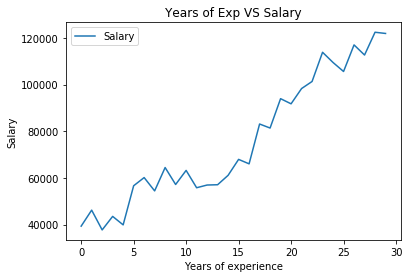

In [16]:
plt.plot(data['Salary'])
plt.title('Years of Exp VS Salary')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

C:\Users\hai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


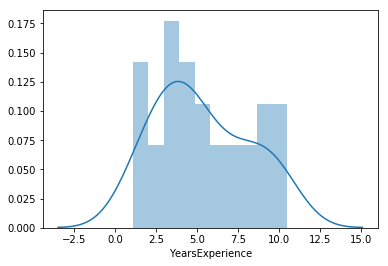

In [11]:
sns.distplot(data['YearsExperience'],kde=True,bins=10)

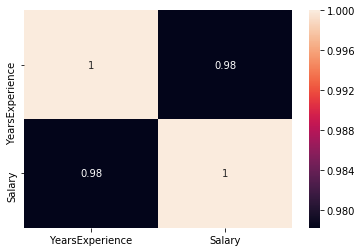

In [17]:
sns.heatmap(data.corr(),annot=True)

In [20]:
# Check for missing data.
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [44]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
X.shape,y.shape

((30, 1), (30,))

In [45]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
predictions=lr.predict(x_test)
predictions

array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [57]:
a0=lr.coef_
a1=lr.intercept_
a0,a1

(array([9202.23359825]), 26049.577715443345)

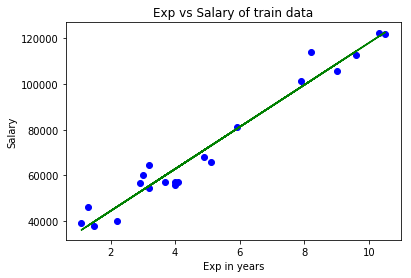

In [53]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,lr.predict(X_train),color='green')
plt.title('Exp vs Salary of train data')
plt.xlabel('Exp in years')
plt.ylabel('Salary')
plt.show()


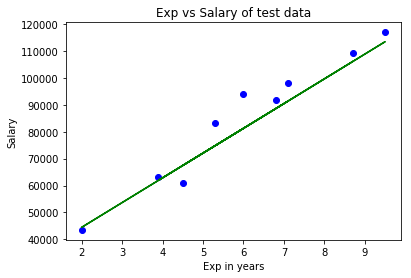

In [55]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lr.predict(x_test),color='green')
plt.title('Exp vs Salary of test data')
plt.xlabel('Exp in years')
plt.ylabel('Salary')
plt.show()

In [56]:
from sklearn import metrics
import numpy as np
print('Mean absolute error MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Sqrt error MSE: ',metrics.mean_squared_error(y_test,predictions))
print('Root mean square error RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2 value: ',metrics.r2_score(y_test,predictions))

Mean absolute error MAE:  5146.886734888229
Mean Sqrt error MSE:  39139215.99958854
Root mean square error RMSE:  6256.134269625976
r2 value:  0.9248580247217076
